In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [21]:
# load the dataset
dataset = pd.read_csv("heart_disease_uci.csv")
print(dataset.head())  

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['sex','dataset', 'cp','fbs', 'restecg','exang', 'slope', 'thal']
encoder = LabelEncoder()

for col in categorical_cols:
    dataset[col] = encoder.fit_transform(dataset[col])

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int32  
 3   dataset   920 non-null    int32  
 4   cp        920 non-null    int32  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       920 non-null    int32  
 8   restecg   920 non-null    int32  
 9   thalch    865 non-null    float64
 10  exang     920 non-null    int32  
 11  oldpeak   858 non-null    float64
 12  slope     920 non-null    int32  
 13  ca        309 non-null    float64
 14  thal      920 non-null    int32  
 15  num       920 non-null    int64  
dtypes: float64(5), int32(8), int64(3)
memory usage: 86.4 KB


In [25]:
# check for missing values and remove them
print(dataset.isnull().sum())
dataset = dataset.dropna()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope         0
ca          611
thal          0
num           0
dtype: int64


C:\Users\USER 1\AppData\Local\Temp\ipykernel_13864\4278503227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num', data=dataset, palette='coolwarm')


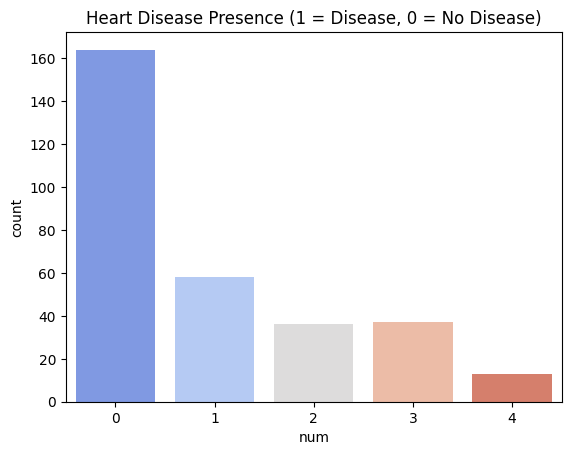

In [26]:
# Distribution of target
sns.countplot(x='num', data=dataset, palette='coolwarm')
plt.title("Heart Disease Presence (1 = Disease, 0 = No Disease)")
plt.show()

In [27]:
# prepare dataset for training, split the dataset into features and target variable
X = dataset.drop('num', axis=1)
y = dataset['num']

In [39]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
# # Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\USER 1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [38]:
# # Decision Tree (uncomment to use instead)
# model = DecisionTreeClassifier(max_depth=5, random_state=42)
# model.fit(X_train, y_train)

In [41]:
# prediction and evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For ROC curve


In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        34
           1       0.33      0.30      0.32        10
           2       0.00      0.00      0.00        10
           3       0.09      0.20      0.12         5
           4       0.00      0.00      0.00         3

    accuracy                           0.58        62
   macro avg       0.24      0.29      0.26        62
weighted avg       0.50      0.58      0.54        62



C:\Users\USER 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER 1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

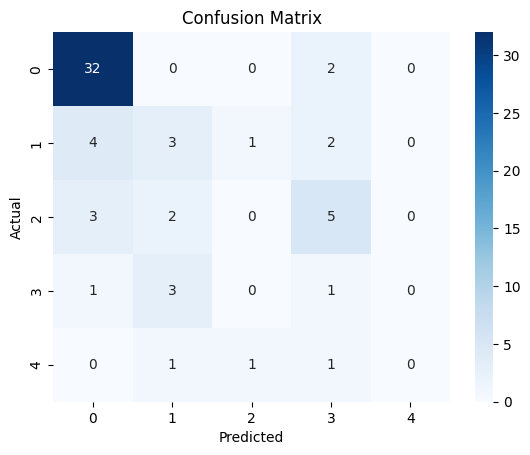

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()